# Advanced Business Analytics Capstone

## Module 1 : Understand the data and prepare your data for analysis

In [134]:
#Import librairies
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

import pandas as pd

In [135]:
#Download file Lending_Club.csv
lclub = pd.read_csv("Lending_Club.csv", sep = ";")

#Display first rows
lclub.head(5)

,id,member_id,term,purpose,loan_status,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt
0,62286683,66483442,36 months,credit_card,Fully Paid,24000,"7,89","750,86",MORTGAGE,237500,Source Verified,28279,"36,9",25,5,"24948,45"
1,46314315,49422035,36 months,credit_card,Fully Paid,8000,"6,68","245,85",RENT,41000,Not Verified,24377,51,29,2,"8351,63"
2,51317198,54726945,36 months,credit_card,Fully Paid,12175,"9,17","388,13",MORTGAGE,100000,Not Verified,21329,"64,6",17,3,"13205,91"
3,42984750,45981489,36 months,credit_card,Charged Off,6400,"6,92","197,38",RENT,41900,Source Verified,14936,"73,2",15,1,"3550,38"
4,42181434,45138158,36 months,credit_card,Fully Paid,12600,"6,68","387,22",OWN,73800,Not Verified,9904,"20,7",25,4,"13125,77"


In [136]:
#Show information about the dataset
lclub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7151 entries, 0 to 7150
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    7151 non-null   int64 
 1   member_id             7151 non-null   int64 
 2   term                  7151 non-null   object
 3   purpose               7151 non-null   object
 4   loan_status           7151 non-null   object
 5   loan_amnt             7151 non-null   int64 
 6   int_rate              7151 non-null   object
 7   installment           7151 non-null   object
 8   home_ownership        7151 non-null   object
 9   annual_inc            7151 non-null   object
 10  verification_status   7151 non-null   object
 11  revol_bal             7151 non-null   int64 
 12  revol_util            7148 non-null   object
 13  total_acc             7151 non-null   int64 
 14  acc_open_past_24mths  7151 non-null   int64 
 15  total_pymnt           7151 non-null   

In [137]:
#Remove unnecessary columns
lclub = lclub.drop(columns=['id', 'member_id'])

In [138]:
# Fix incorrect data types for numerical columns ('int_rate', 'installment', 'annual_inc', 'total_pymnt', 'revol_util')
num_cols_to_fix = ['int_rate', 'installment', 'annual_inc', 'total_pymnt', 'revol_util']

for col in num_cols_to_fix:
    # Convert values to string for cleaning
    lclub[col] = lclub[col].astype(str)

    # Remove common non-numeric characters (% $ ,) and strip whitespace
    lclub[col] = (
        lclub[col]
        .str.replace('%', '', regex=False)
        .str.replace('$', '', regex=False)
        .str.replace(',', '.', regex=False)
        .str.strip()
)

    # Convert cleaned strings to numeric (float), coercing errors to NaN
    lclub[col] = pd.to_numeric(lclub[col], errors='coerce')

In [139]:
lclub.head(5)

,term,purpose,loan_status,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt
0,36 months,credit_card,Fully Paid,24000,7.89,750.86,MORTGAGE,237500.0,Source Verified,28279,36.9,25,5,24948.45
1,36 months,credit_card,Fully Paid,8000,6.68,245.85,RENT,41000.0,Not Verified,24377,51.0,29,2,8351.63
2,36 months,credit_card,Fully Paid,12175,9.17,388.13,MORTGAGE,100000.0,Not Verified,21329,64.6,17,3,13205.91
3,36 months,credit_card,Charged Off,6400,6.92,197.38,RENT,41900.0,Source Verified,14936,73.2,15,1,3550.38
4,36 months,credit_card,Fully Paid,12600,6.68,387.22,OWN,73800.0,Not Verified,9904,20.7,25,4,13125.77


In [140]:
# Select columns with object dtype
object_cols = lclub.select_dtypes(include='object').columns.tolist()

# Display unique values for each object column
for col in object_cols:
    unique_vals = lclub[col].unique()
    print(f"Column '{col}' ({len(unique_vals)} unique categories):")
    print(unique_vals, "\n")

Column 'term' (1 unique categories):
[' 36 months'] 

Column 'purpose' (1 unique categories):
['credit_card'] 

Column 'loan_status' (2 unique categories):
['Fully Paid' 'Charged Off'] 

Column 'home_ownership' (3 unique categories):
['MORTGAGE' 'RENT' 'OWN'] 

Column 'verification_status' (3 unique categories):
['Source Verified' 'Not Verified' 'Verified'] 



In [141]:
'''
Columns with only one unique value provide no predictive information and should be removed before modeling.
Keeping such constant features can unnecessarily complicate the model without improving performance.
It’s best practice to drop these columns for cleaner, more effective analysis.
'''
#Remove unnecessary columns
lclub = lclub.drop(columns=['term', 'purpose'])

# Filter to keep only the two target classes of interest, then binary encoding
lclub = lclub[lclub['loan_status'].isin(['Fully Paid', 'Charged Off'])]
lclub['loan_status'] = lclub['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

#Encode categorical variables using one-hot encoding (more than 2 categories)
cat_cols = ['home_ownership', 'verification_status']
lclub = pd.get_dummies(lclub, columns = cat_cols, drop_first = True)

In [142]:
#Check for duplicates
print(f"Duplicates: {lclub.duplicated().sum()}")
lclub = lclub.drop_duplicates()

Duplicates: 0


In [143]:
#Display the number of missing values
print(lclub.isnull().sum())

loan_status                            0
loan_amnt                              0
int_rate                               0
installment                            0
annual_inc                             0
revol_bal                              0
revol_util                             3
total_acc                              0
acc_open_past_24mths                   0
total_pymnt                            0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Source Verified    0
verification_status_Verified           0
dtype: int64


In [144]:
'''
Since there are only a few missing values in 'revol_util' column, I decided
to remove those rows. This ensures the dataset remains clean without compromising
the overall sample size significantly.
'''
#Manage missing values
lclub = lclub.dropna(subset=['revol_util'])

#Validate that the changes have been completed
lclub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7148 entries, 0 to 7150
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_status                          7148 non-null   int64  
 1   loan_amnt                            7148 non-null   int64  
 2   int_rate                             7148 non-null   float64
 3   installment                          7148 non-null   float64
 4   annual_inc                           7148 non-null   float64
 5   revol_bal                            7148 non-null   int64  
 6   revol_util                           7148 non-null   float64
 7   total_acc                            7148 non-null   int64  
 8   acc_open_past_24mths                 7148 non-null   int64  
 9   total_pymnt                          7148 non-null   float64
 10  home_ownership_OWN                   7148 non-null   bool   
 11  home_ownership_RENT                

In [147]:
#Import librairies
from sklearn.preprocessing import StandardScaler
import numpy as np

#Initialize the scaler
scaler = StandardScaler()

#Compute z-scores without modifying the original dataset
z_scores = pd.DataFrame(scaler.fit_transform(lclub[num_cols_to_fix]),
                        columns=num_cols_to_fix,
                        index=lclub.index)

In [148]:
# Create a mask for outliers (absolute z-score > 3)
outlier_mask = (z_scores.abs() > 3)

# Count the number of outliers per column
outliers_count = outlier_mask.sum()

# Keep columns with at least one outlier
outliers_count = outliers_count[outliers_count > 0]

print("Number of outliers per column:")
print(outliers_count)

Number of outliers per column:
int_rate        30
installment     30
annual_inc     107
total_pymnt     25
dtype: int64


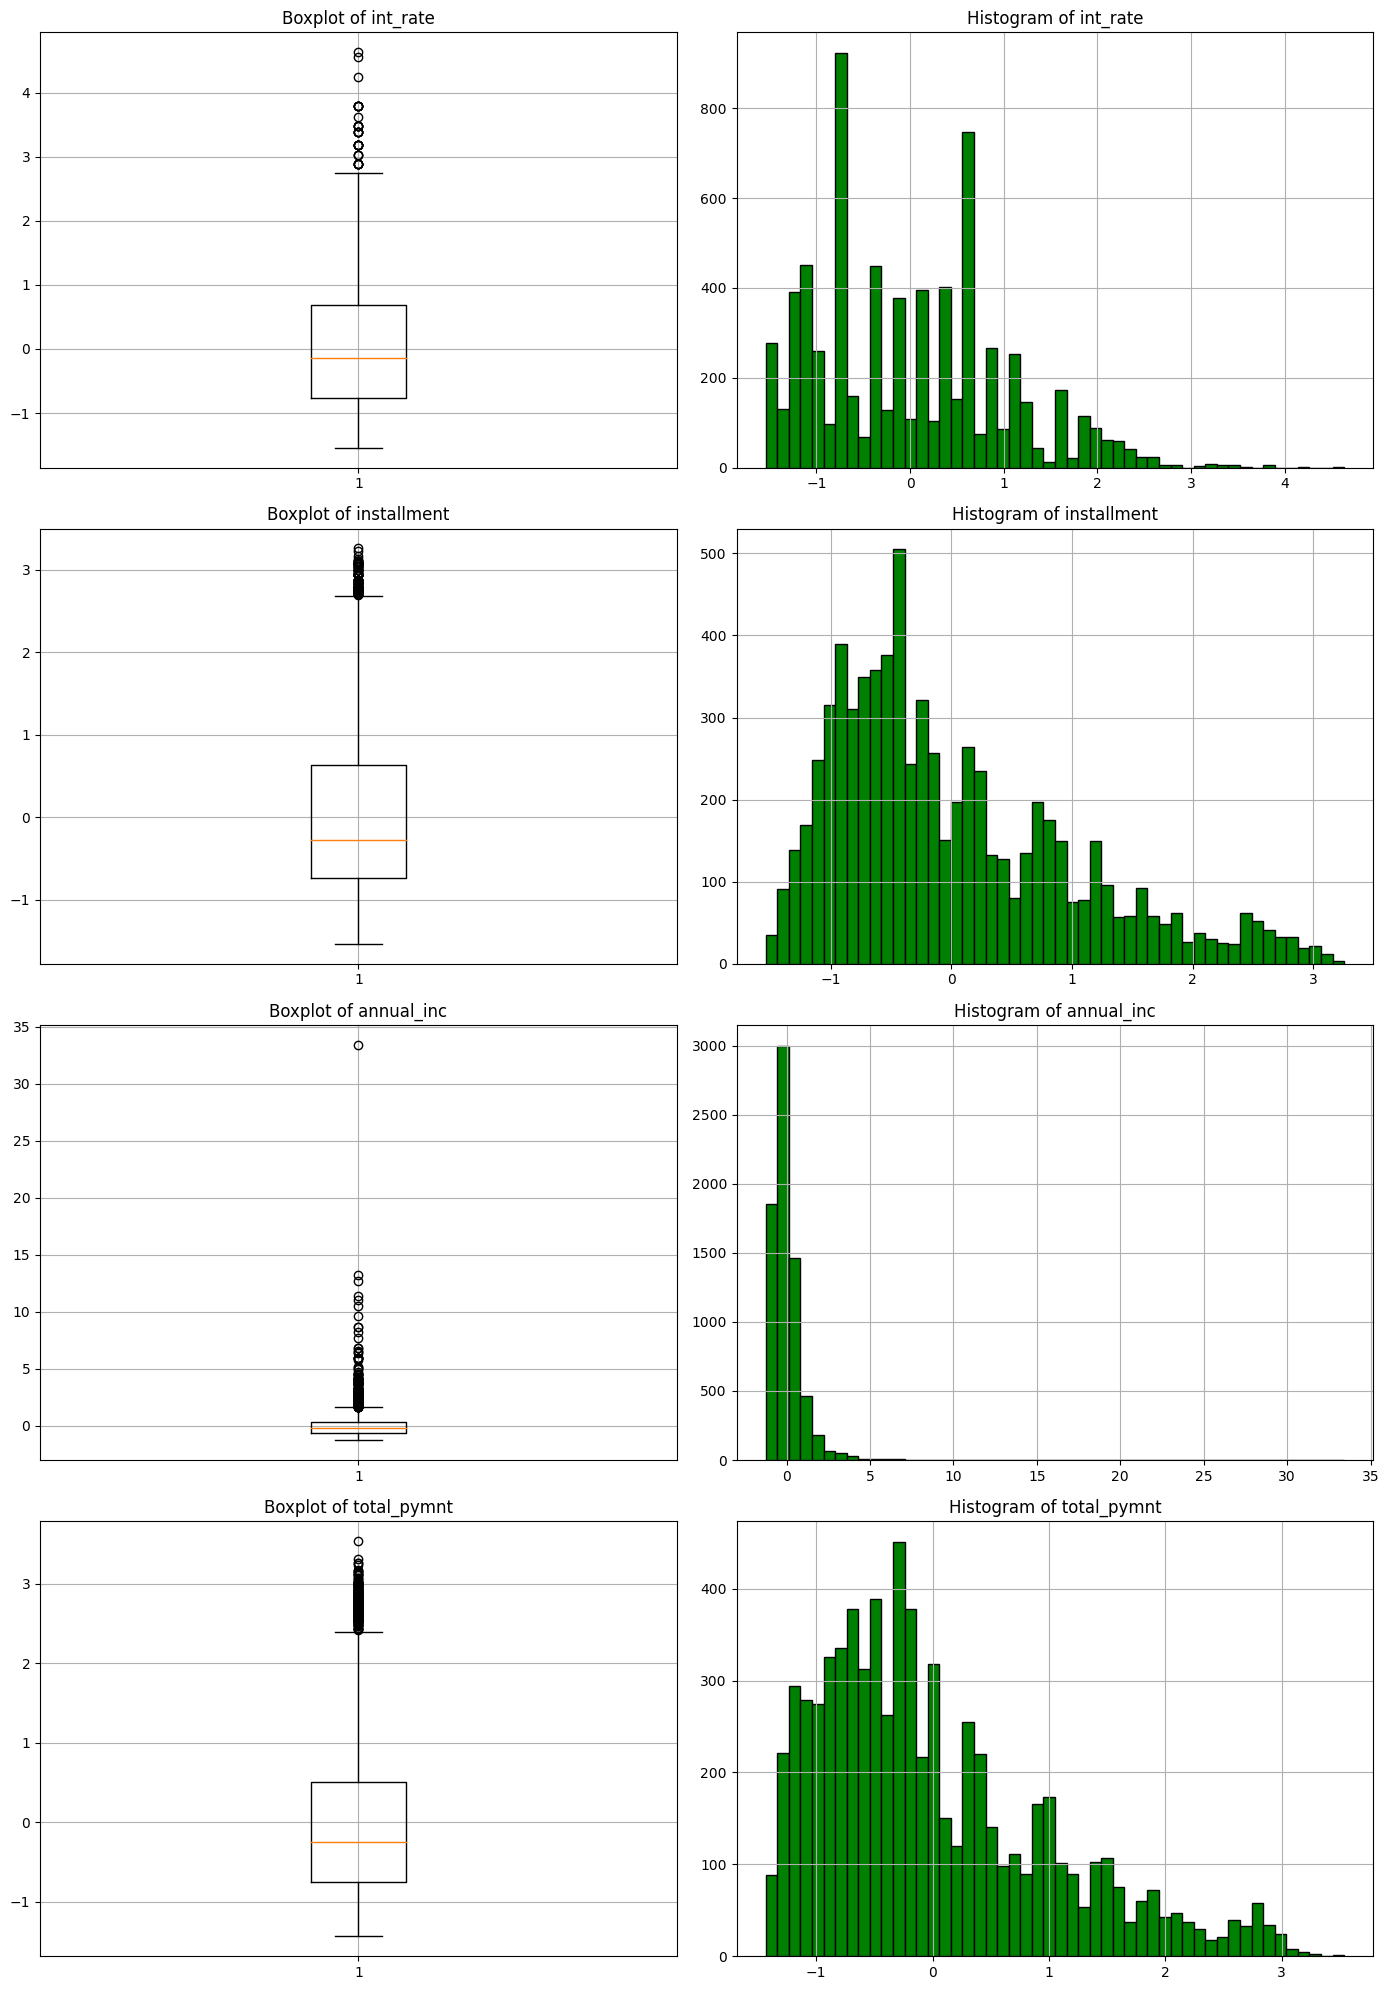

In [149]:
#Import library
import matplotlib.pyplot as plt

#Create graphs
cols_to_plot = ['int_rate', 'installment', 'annual_inc', 'total_pymnt']
plt.figure(figsize = (14,20))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(4, 2, 2*i - 1)
    plt.boxplot(z_scores[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.grid(True)

    plt.subplot(4, 2, 2*i)
    plt.hist(z_scores[col].dropna(), bins=50, color='green', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [153]:
'''

In the context of Lending Club’s peer-to-peer lending platform, extreme values in financial variables
such as interest rates, installment payments, annual income, and total payments can disproportionately
influence predictive models. For example, very high interest rates or large payment amounts may represent
rare but impactful borrower profiles that can skew model training. Similarly, annual income reported by
borrowers varies widely and may include extreme values that do not represent the typical borrower.

To mitigate these risks, winsorization was applied to cap these extreme values at ±3 standard deviations.
This ensures the model remains robust and generalizes well by reducing the undue influence of outliers 
while retaining most data points.
 
'''

# Define columns and their respective winsorization percentiles
cols_1_99 = ['int_rate', 'installment', 'total_pymnt']
col_5_95 = 'annual_inc'

# Winsorize columns at 1st and 99th percentiles
for col in cols_1_99:
    lower = lclub[col].quantile(0.01)
    upper = lclub[col].quantile(0.99)
    lclub[col] = np.clip(lclub[col], lower, upper)

# Winsorize annual_inc at 5th and 95th percentiles
lower_ai = lclub[col_5_95].quantile(0.05)
upper_ai = lclub[col_5_95].quantile(0.95)
lclub[col_5_95] = np.clip(lclub[col_5_95], lower_ai, upper_ai)

# Recalculate z-scores to validate winsorization effect
cols_all = cols_1_99 + [col_5_95]
scaler = StandardScaler()
z_scores_after = pd.DataFrame(scaler.fit_transform(lclub[cols_all]),
                              columns=cols_all,
                              index=lclub.index)

print("Z-score range after winsorization (1-99 for most, 5-95 for annual_inc):")
print(z_scores_after.agg(['min', 'max']), "\n")

# Count remaining outliers with absolute z-score > 3
outlier_mask = (z_scores_after.abs() > 3)
outliers_count = outlier_mask.sum()
print("Number of outliers per column after winsorization:")
print(outliers_count)

Z-score range after winsorization (1-99 for most, 5-95 for annual_inc):
     int_rate  installment  total_pymnt  annual_inc
min -1.561744    -1.408393    -1.351099   -1.303701
max  2.495138     2.808250     2.858868    2.412070 

Number of outliers per column after winsorization:
int_rate       0
installment    0
total_pymnt    0
annual_inc     0
dtype: int64


## Data Visualization

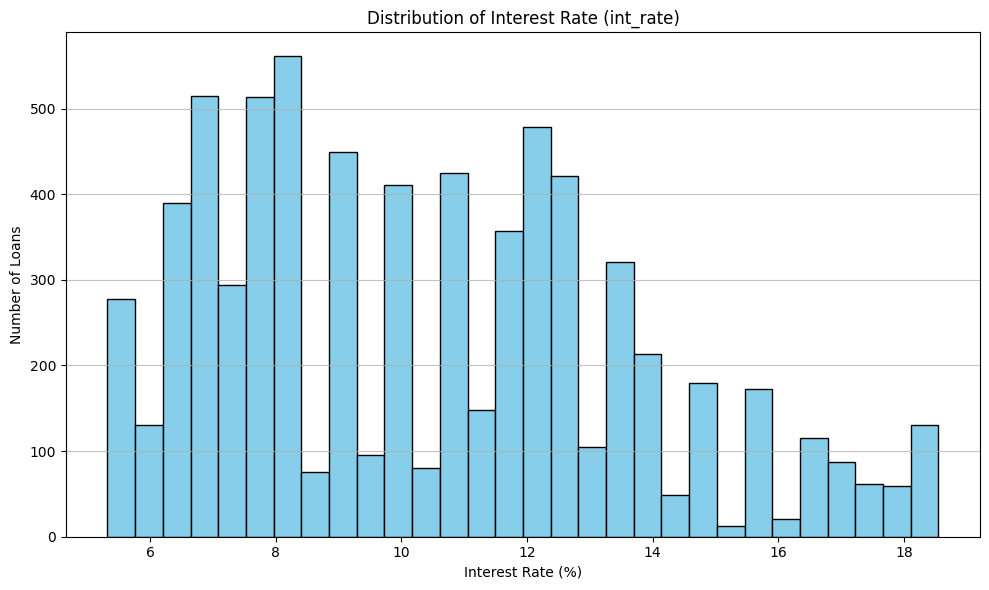

In [156]:
#Create a plot to illustrate the distribution of interest rate (int_rate)

plt.figure(figsize=(10, 6))
plt.hist(lclub['int_rate'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Interest Rate (int_rate)')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Number of Loans')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

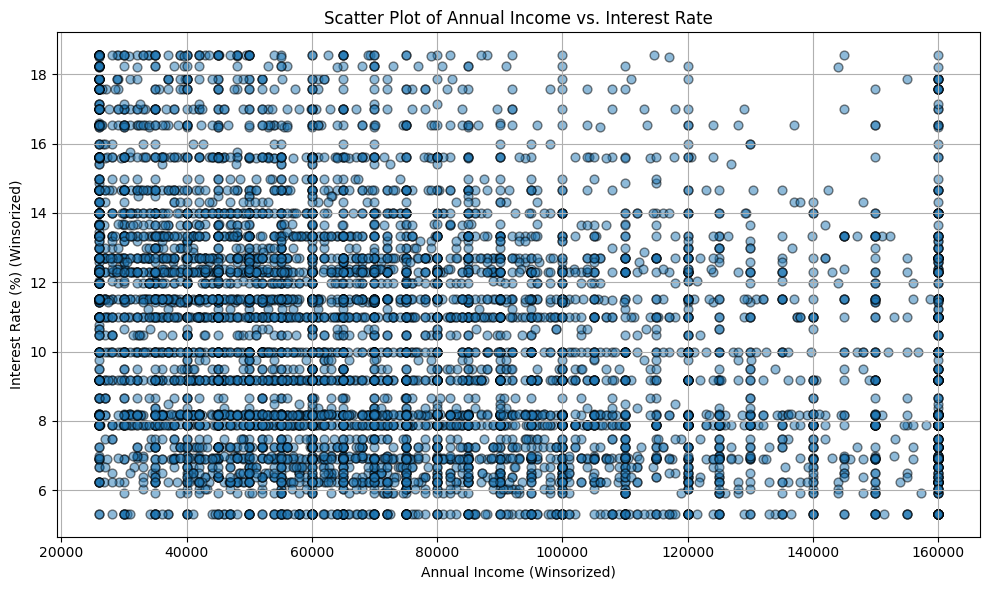

In [155]:
#What is the relationship between annual income and interest rate? Create a plot to illustrate this relationship

# Use the winsorized columns in lclub
x = lclub['annual_inc']
y = lclub['int_rate']

plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.5, edgecolor='k', s=40)
plt.title('Scatter Plot of Annual Income vs. Interest Rate')
plt.xlabel('Annual Income (Winsorized)')
plt.ylabel('Interest Rate (%) (Winsorized)')
plt.grid(True)
plt.tight_layout()
plt.show()


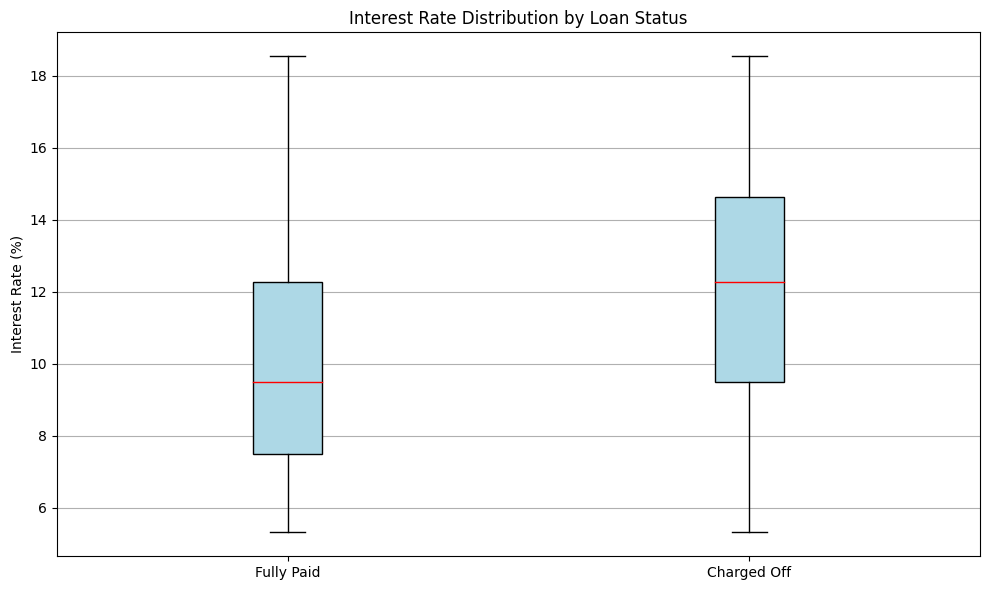

In [159]:
#Create a plot to show an interesting aspect of the data
import matplotlib.pyplot as plt

# Prepare data grouped by loan_status
fully_paid = lclub[lclub['loan_status'] == 0]['int_rate']  # Fully Paid = 0
charged_off = lclub[lclub['loan_status'] == 1]['int_rate']  # Charged Off = 1

plt.figure(figsize=(10,6))

# Create boxplots side by side
plt.boxplot([fully_paid, charged_off],
            labels=['Fully Paid', 'Charged Off'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'))

plt.title('Interest Rate Distribution by Loan Status')
plt.ylabel('Interest Rate (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()